In [1]:
import os
from glob import glob

import numpy as np

import tensorflow as tf
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
os.getcwd() #현재 경로 확인

'C:\\Users\\jeong\\Desktop\\Folder\\study\\ML\\Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch\\실습 코드'

In [9]:
os.listdir('../dataset/mnist_png/training/') # 경로에 어떤 데이터가 있는지 리스트로

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [13]:
data_paths = glob('../dataset/mnist_png/training/*/*.png')

In [14]:
len(data_paths)

60000

In [15]:
path = data_paths[0]
path

'../dataset/mnist_png/training\\0\\1.png'

# 데이터 분석 (MNIST)

In [16]:
os.listdir('../dataset/mnist_png/training/')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [17]:
len(os.listdir('../dataset/mnist_png/training/'))

10

In [18]:
label_nums = os.listdir('../dataset/mnist_png/training/')
label_nums

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Label 0의 데이터 갯수 확인

In [19]:
len(label_nums)

10

### 데이터 별 갯수 비교

In [21]:
nums_dataset = []

for lbl_n in label_nums:
    data_per_class = os.listdir('../dataset/mnist_png/training/' + lbl_n)
    nums_dataset.append(len(data_per_class))

In [22]:
label_nums

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [23]:
nums_dataset

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

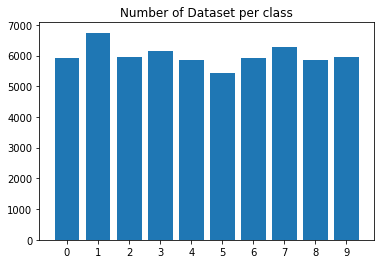

In [26]:
plt.bar(label_nums, nums_dataset)
plt.title('Number of Dataset per class')
plt.show()

# Pillow로 열기

In [27]:
image_pil = Image.open(path)
image = np.array(image_pil)

In [28]:
image.shape

(28, 28)

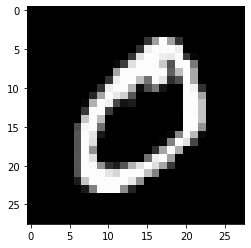

In [29]:
plt.imshow(image, 'gray')
plt.show()

# TensorFlow로 열기

In [30]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [31]:
image.shape

TensorShape([28, 28, 1])

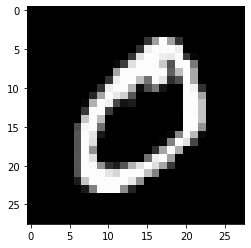

In [32]:
plt.imshow(image[:, :, 0], 'gray')
plt.show()

# Label 얻기

In [33]:
path

'../dataset/mnist_png/training\\0\\1.png'

In [36]:
label = path.split('\\')[-2]

In [37]:
int(label)

0

In [38]:
def get_label(path):
    class_name = path.split('\\')[-2]
    label = int(class_name)
    return label

In [39]:
path, get_label(path)

('../dataset/mnist_png/training\\0\\1.png', 0)

# 데이터 이미지 사이즈 알기

In [50]:
from tqdm.notebook import tqdm # progress bar

In [42]:
heights = []
widths = []

In [43]:
len(data_paths)

60000

In [44]:
image.shape

TensorShape([28, 28, 1])

In [46]:
img_pil = Image.open(path)
image = np.array(img_pil)
image.shape

(28, 28)

In [47]:
h, w = image.shape

In [51]:
for path in tqdm(data_paths):
    img_pil = Image.open(path)
    image = np.array(img_pil)
    h, w = image.shape
    
    heights.append(h)
    widths.append(w)

  0%|          | 0/60000 [00:00<?, ?it/s]

In [54]:
np.unique(heights)

array([28])

In [55]:
np.unique(widths)

array([28])

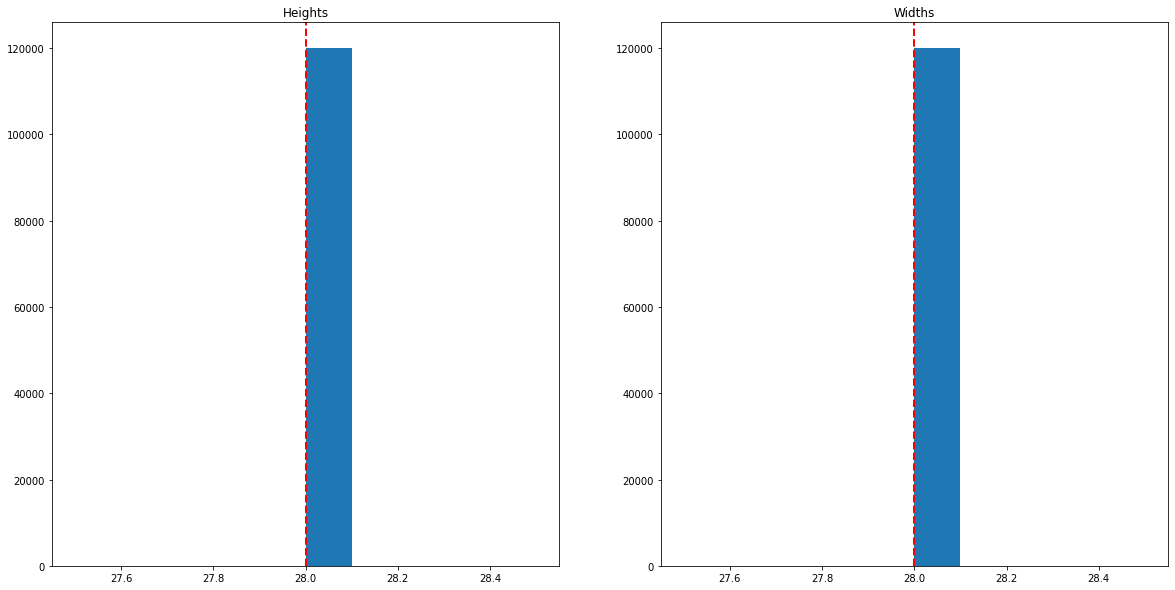

In [57]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.hist(heights)
plt.title('Heights')
plt.axvline(np.mean(heights), color='r', linestyle='dashed', linewidth=2)

plt.subplot(1, 2, 2)
plt.hist(widths)
plt.title('Widths')
plt.axvline(np.mean(widths), color='r', linestyle='dashed', linewidth=2)

plt.show()